<a href="https://colab.research.google.com/github/gorkemturkut57/Cat-vs-Dog-Classifier-Comparison-Custom-CNN-vs-VGG-16/blob/main/CatOrDog_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# Google Drive'ı bağlama
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/archive.zip'  # Bu kısmı kendi dosya yolunuza göre değiştirin

# ZIP dosyasını çıkarma
extract_path = '/content/data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Klasör yapısını kontrol etme
print("Ana dizin:", os.listdir(extract_path))
print("Eğitim seti:", os.listdir(os.path.join(extract_path, 'training_set')))
print("Test seti:", os.listdir(os.path.join(extract_path, 'test_set')))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ana dizin: ['training_set', 'test_set']
Eğitim seti: ['training_set']
Test seti: ['test_set']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def find_actual_data_folder(base_path, folder_name):
    """İç içe klasör yapısında doğru veri klasörünü bulur"""
    # Olası klasör yollarını kontrol et
    possible_paths = [
        os.path.join(base_path, folder_name, 'cats'),  # /training_set/cats
        os.path.join(base_path, folder_name, folder_name, 'cats')  # /training_set/training_set/cats
    ]

    for path in possible_paths:
        if os.path.exists(path):
            return os.path.dirname(path)  # 'cats'in bir üst klasörünü döndür

    # Hiçbir yol bulunamazsa orijinal yolu döndür
    return os.path.join(base_path, folder_name)

# Veri artırma ayarları
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Doğru klasör yollarını bul
actual_train_path = find_actual_data_folder(extract_path, 'training_set')
actual_test_path = find_actual_data_folder(extract_path, 'test_set')

print(f"Eğitim verileri şuradan yüklenecek: {actual_train_path}")
print(f"Test verileri şuradan yüklenecek: {actual_test_path}")

# Veri yükleyicileri oluştur
train_generator = train_datagen.flow_from_directory(
    actual_train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    actual_test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Kontroller
print("\nKlasör yapısı kontrolü:")
print(f"Eğitim setindeki sınıflar: {train_generator.class_indices}")
print(f"Toplam eğitim örnekleri: {train_generator.samples}")
print(f"Toplam test örnekleri: {validation_generator.samples}")

Eğitim verileri şuradan yüklenecek: /content/data/training_set/training_set
Test verileri şuradan yüklenecek: /content/data/test_set/test_set
Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.

Klasör yapısı kontrolü:
Eğitim setindeki sınıflar: {'cats': 0, 'dogs': 1}
Toplam eğitim örnekleri: 8005
Toplam test örnekleri: 2023


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1. Konvolüsyon Katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2. Konvolüsyon Katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3. Konvolüsyon Katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4. Konvolüsyon Katmanı
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Tam bağlı katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification için sigmoid

# Modeli derleme
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,815,937 (26.00 MB)

 Trainable params: 6,813,953 (25.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback'ler
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Model eğitimi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5625 - loss: 0.9975

250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 278ms/step - accuracy: 0.5625 - loss: 0.9969 - val_accuracy: 0.4995 - val_loss: 1.5791
Epoch 2/20
  1/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5625 - loss: 0.8385

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5625 - loss: 0.8385 - val_accuracy: 0.4990 - val_loss: 1.4408
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.6172 - loss: 0.7067

250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 333ms/step - accuracy: 0.6172 - loss: 0.7066 - val_accuracy: 0.5744 - val_loss: 0.7307
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7500 - loss: 0.4950 - val_accuracy: 0.5734 - val_loss: 0.7334
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6552 - loss: 0.6434

250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 0.6552 - loss: 0.6434 - val_accuracy: 0.6949 - val_loss: 0.5794
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6875 - loss: 0.6679 - val_accuracy: 0.6880 - val_loss: 0.5800
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.6836 - loss: 0.5970

250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.6836 - loss: 0.5970 - val_accuracy: 0.7183 - val_loss: 0.5412
Epoch 8/20
  1/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6875 - loss: 0.6303

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6875 - loss: 0.6303 - val_accuracy: 0.7197 - val_loss: 0.5397
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7008 - loss: 0.5801

250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.7008 - loss: 0.5800 - val_accuracy: 0.7356 - val_loss: 0.5283
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7188 - loss: 0.5743 - val_accuracy: 0.7376 - val_loss: 0.5295
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 0.7230 - loss: 0.5570 - val_accuracy: 0.6032 - val_loss: 0.8602
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6875 - loss: 0.6476 - val_accuracy: 0.5967 - val_loss: 0.9664
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 330ms/step - accuracy: 0.7414 - loss: 0.5198 - val_accuracy: 0.7262 - val_loss: 0.5330
Epoch 14/20
  1/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6875 - loss: 0.4453

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6875 - loss: 0.4453 - val_accuracy: 0.7460 - val_loss: 0.5042
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7508 - loss: 0.5119

250/250 ━━━━━━━━━━━━━━━━━━━━ 117s 243ms/step - accuracy: 0.7508 - loss: 0.5118 - val_accuracy: 0.7669 - val_loss: 0.4961
Epoch 16/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7188 - loss: 0.5893 - val_accuracy: 0.7445 - val_loss: 0.5309
Epoch 17/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 0.7596 - loss: 0.4955 - val_accuracy: 0.7535 - val_loss: 0.5259
Epoch 18/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7812 - loss: 0.4236 - val_accuracy: 0.5987 - val_loss: 0.8264
Epoch 19/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7653 - loss: 0.4832

250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 278ms/step - accuracy: 0.7653 - loss: 0.4832 - val_accuracy: 0.7817 - val_loss: 0.4465
Epoch 20/20
  1/250 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7500 - loss: 0.4034

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7500 - loss: 0.4034 - val_accuracy: 0.7852 - val_loss: 0.4383


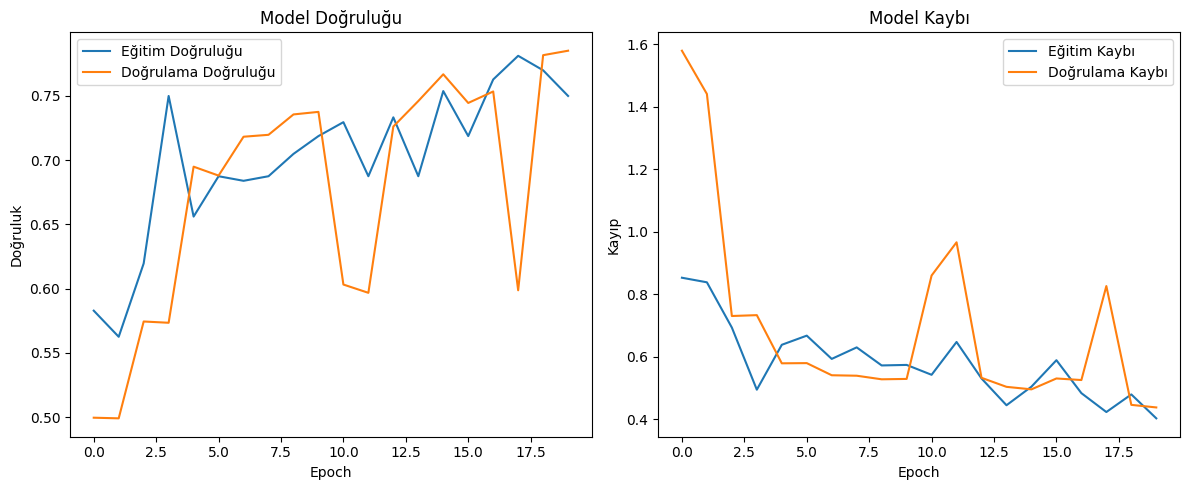

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7789 - loss: 0.4434
Test Doğruluğu: 78.55%


In [ ]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Test setinde değerlendirme
loss, accuracy = model.evaluate(validation_generator)
print(f"Test Doğruluğu: {accuracy*100:.2f}%")

Test verileri şuradan yüklenecek: /content/data/test_set/test_set


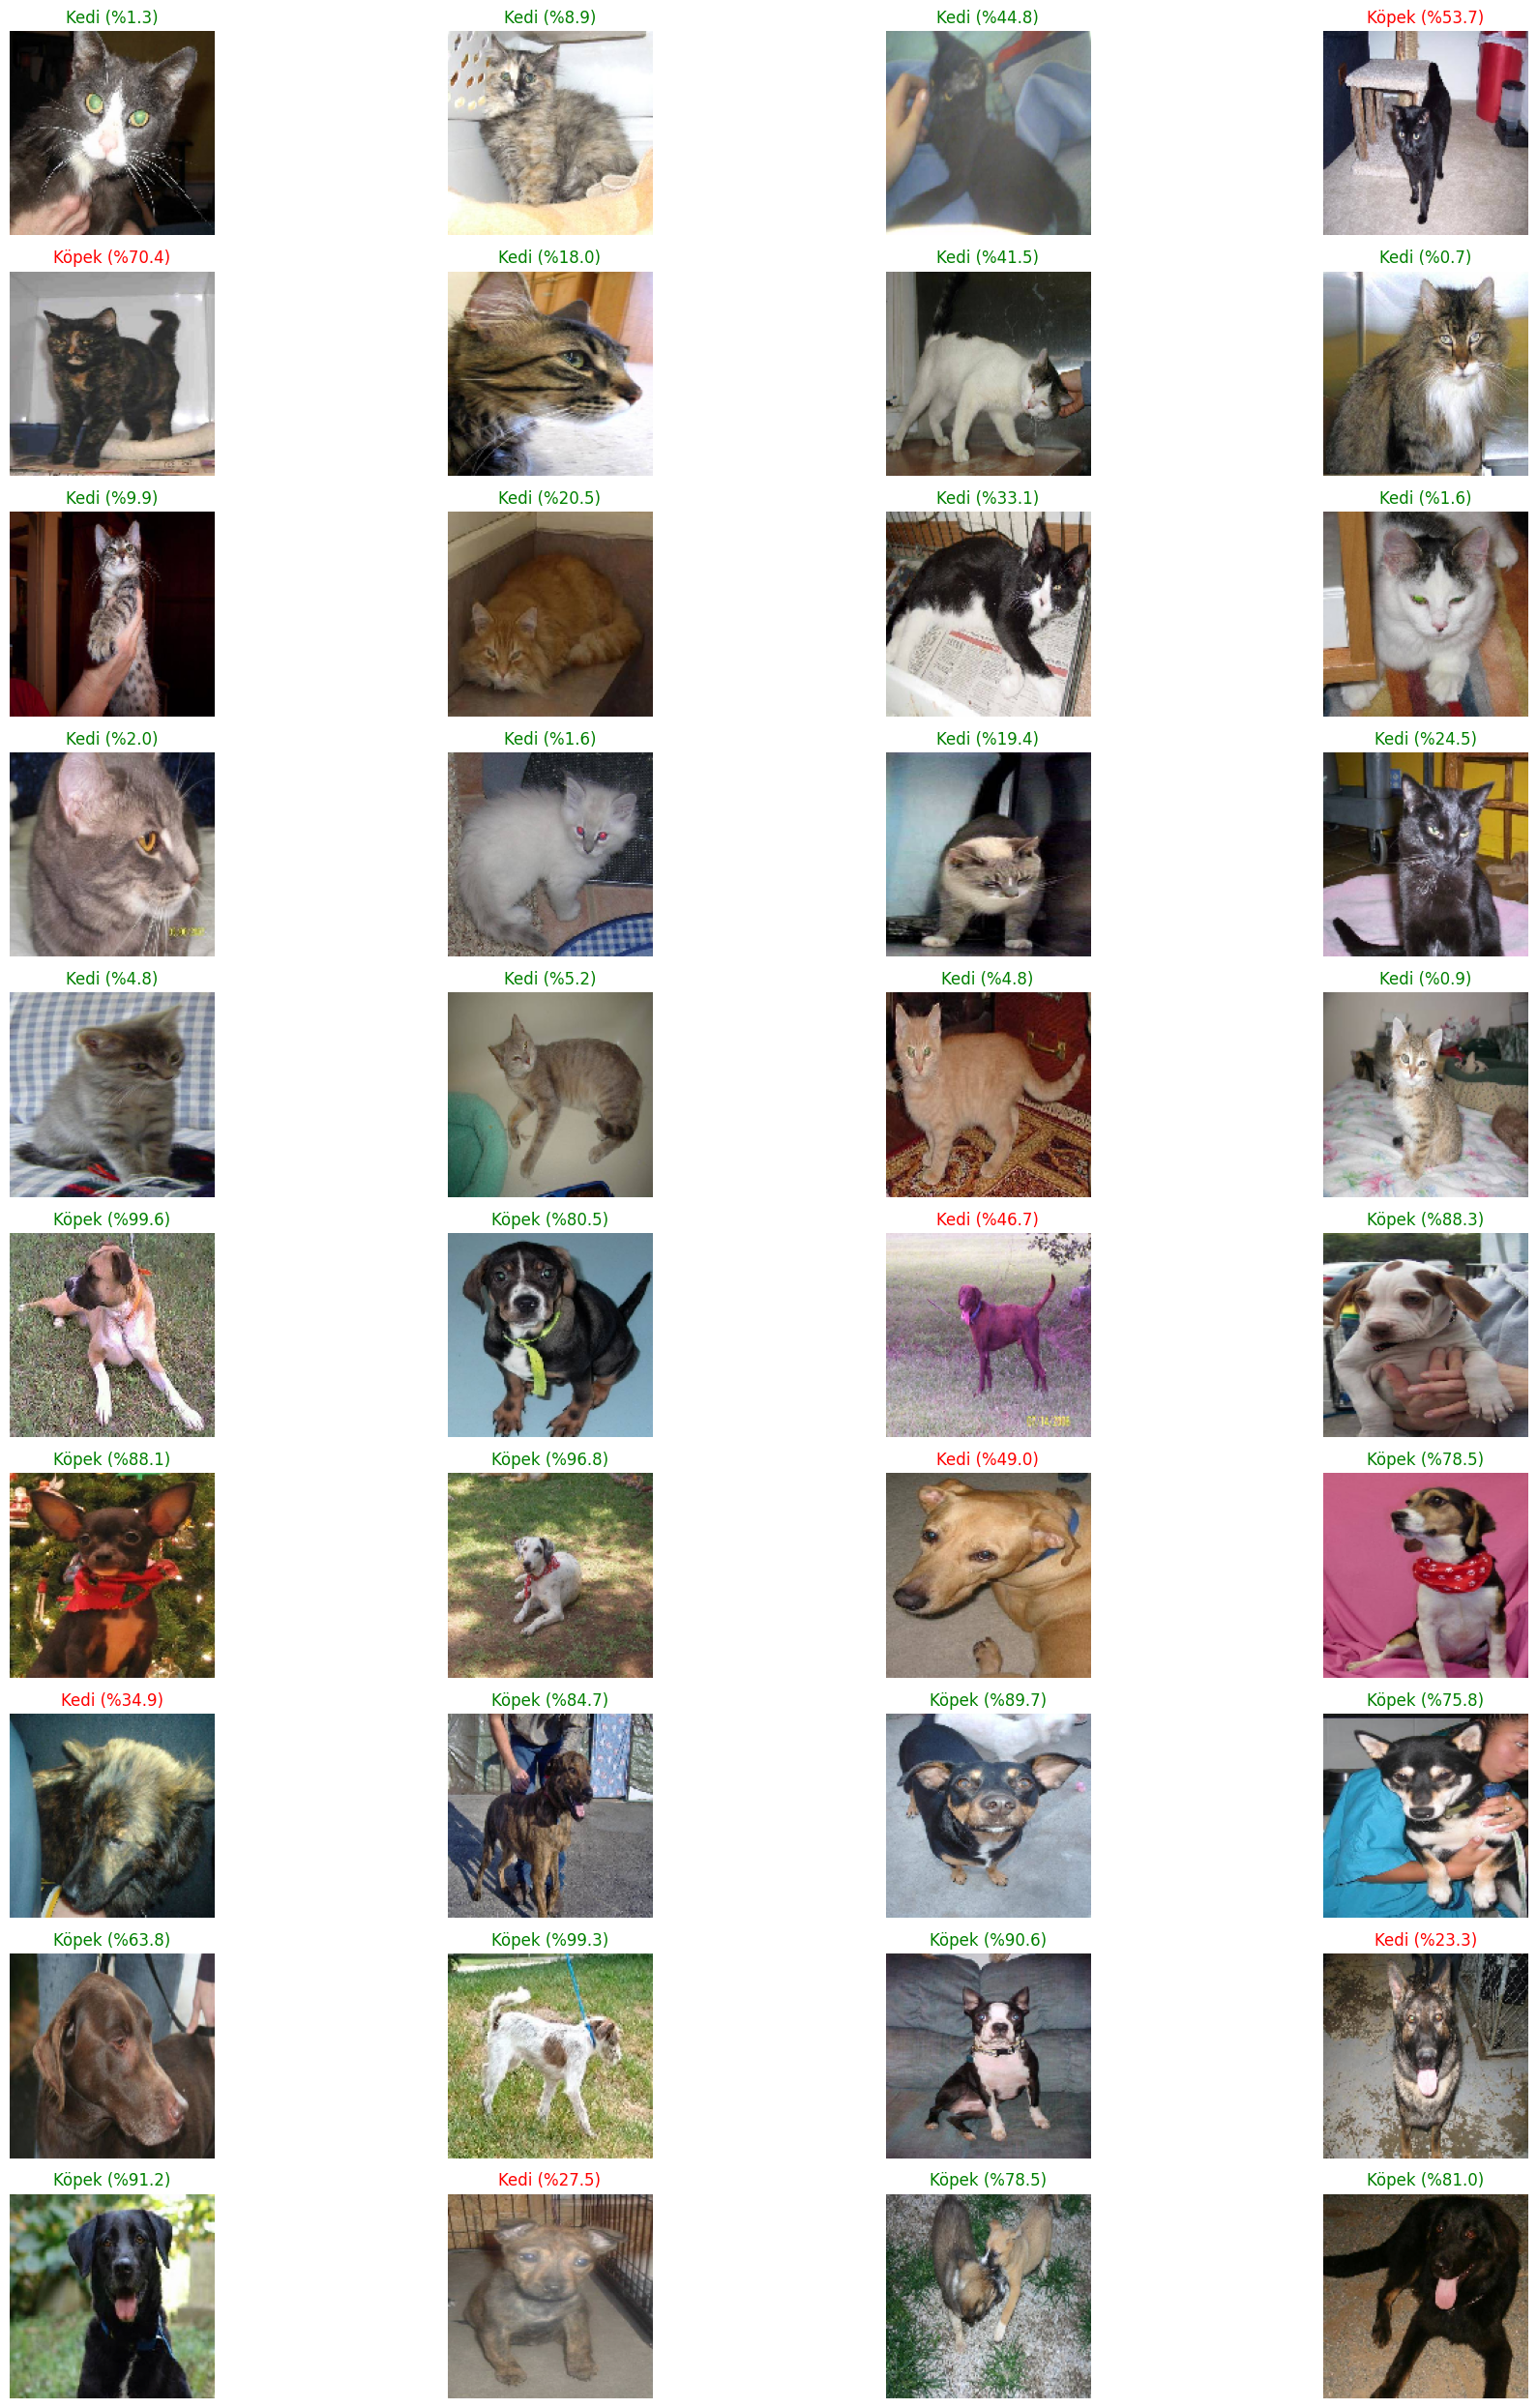


DETAYLI PERFORMANS RAPORU

Genel Doğruluk: %82.50

Kedi Doğruluğu: %90.00 (18/20)
Köpek Doğruluğu: %75.00 (15/20)

Classification Report:
              precision    recall  f1-score   support

     Kediler       0.78      0.90      0.84        20
    Köpekler       0.88      0.75      0.81        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



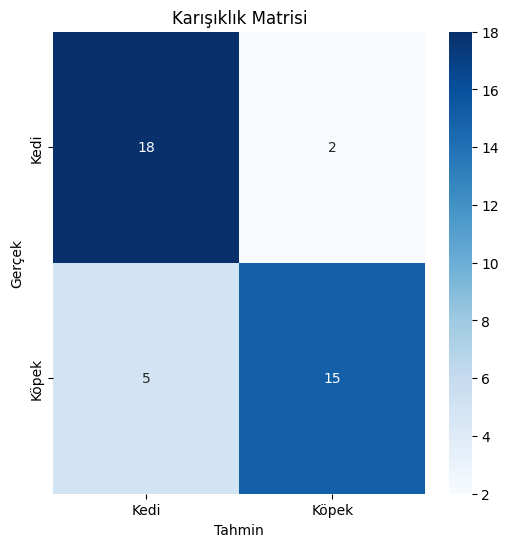

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def find_actual_test_folder(base_path):
    """İç içe test_set klasörünü otomatik bulur"""
    possible_paths = [
        os.path.join(base_path, 'test_set', 'cats'),  # /test_set/cats
        os.path.join(base_path, 'test_set', 'test_set', 'cats')  # /test_set/test_set/cats
    ]

    for path in possible_paths:
        if os.path.exists(path):
            return os.path.dirname(path)  # 'cats'in bir üst klasörünü döndür

    return os.path.join(base_path, 'test_set')  # Fallback

def test_cats_dogs_separately(model, base_test_dir, num_samples=20):
    """
    İç içe klasör yapısına uyumlu kedi-köpek test fonksiyonu

    Args:
        model: Eğitilmiş model
        base_test_dir: Ana test dizini (içinde test_set klasörü olmalı)
        num_samples: Her sınıftan test edilecek örnek sayısı
    """
    # Doğru test klasörünü bul
    actual_test_dir = find_actual_test_folder(base_test_dir)
    print(f"Test verileri şuradan yüklenecek: {actual_test_dir}")

    # Kedi ve köpek klasör yolları
    cat_dir = os.path.join(actual_test_dir, 'cats')
    dog_dir = os.path.join(actual_test_dir, 'dogs')

    # Klasör varlığını kontrol et
    if not os.path.exists(cat_dir) or not os.path.exists(dog_dir):
        raise FileNotFoundError(f"Kedi veya köpek klasörleri bulunamadı: {cat_dir}, {dog_dir}")

    # Rastgele örnekleri seç
    cat_images = [os.path.join(cat_dir, f) for f in os.listdir(cat_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    dog_images = [os.path.join(dog_dir, f) for f in os.listdir(dog_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(cat_images) == 0 or len(dog_images) == 0:
        raise ValueError("Kedi veya köpek görüntüleri bulunamadı")

    selected_cats = np.random.choice(cat_images, min(num_samples, len(cat_images)), replace=False)
    selected_dogs = np.random.choice(dog_images, min(num_samples, len(dog_images)), replace=False)

    # Tüm test görüntüleri
    test_images = list(selected_cats) + list(selected_dogs)
    true_labels = [0]*len(selected_cats) + [1]*len(selected_dogs)

    # Tahminleri yap
    pred_labels = []
    confidences = []

    plt.figure(figsize=(20, 25))

    for i, img_path in enumerate(test_images, 1):
        try:
            # Resmi yükle ve işle
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Tahmin yap
            pred = model.predict(img_array, verbose=0)
            confidence = pred[0][0]
            pred_label = 1 if confidence > 0.5 else 0

            pred_labels.append(pred_label)
            confidences.append(confidence)

            # Görselleştirme
            plt.subplot(10, 4, i)
            plt.imshow(img)

            # Renk kodlaması
            true_label = 0 if 'cat' in os.path.basename(img_path).lower() else 1
            color = 'green' if pred_label == true_label else 'red'

            plt.title(f"{'Köpek' if pred_label==1 else 'Kedi'} (%{confidence*100:.1f})", color=color)
            plt.xlabel(f"Gerçek: {'Köpek' if true_label==1 else 'Kedi'}")
            plt.axis('off')

        except Exception as e:
            print(f"{img_path} işlenirken hata oluştu: {str(e)}")
            continue

    plt.tight_layout()
    plt.show()

    # Performans raporu
    print("\nDETAYLI PERFORMANS RAPORU")
    print("="*50)

    # Genel doğruluk
    accuracy = np.mean(np.array(true_labels) == np.array(pred_labels))
    print(f"\nGenel Doğruluk: %{accuracy*100:.2f}")

    # Sınıf bazında doğruluk
    cat_correct = sum(1 for t, p in zip(true_labels[:num_samples], pred_labels[:num_samples]) if t == p)
    dog_correct = sum(1 for t, p in zip(true_labels[num_samples:], pred_labels[num_samples:]) if t == p)

    print(f"\nKedi Doğruluğu: %{(cat_correct/num_samples)*100:.2f} ({cat_correct}/{num_samples})")
    print(f"Köpek Doğruluğu: %{(dog_correct/num_samples)*100:.2f} ({dog_correct}/{num_samples})")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels, target_names=['Kediler', 'Köpekler']))

    # Confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Kedi', 'Köpek'],
                yticklabels=['Kedi', 'Köpek'])
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.title('Karışıklık Matrisi')
    plt.show()

# Kullanım örneği
base_dir = '/content/data'  # Ana veri dizini
test_cats_dogs_separately(model, base_dir, num_samples=20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.5822 - loss: 0.7000
Epoch 1: val_loss improved from inf to 0.46514, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 305ms/step - accuracy: 0.5827 - loss: 0.6994 - val_accuracy: 0.8125 - val_loss: 0.4651
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.7155 - loss: 0.5594
Epoch 2: val_loss improved from 0.46514 to 0.40579, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.7156 - loss: 0.5591 - val_accuracy: 0.8256 - val_loss: 0.4058
Epoch 3/20
 51/100 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.7601 - loss: 0.4806

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 3: val_loss improved from 0.40579 to 0.37842, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.7660 - loss: 0.4776 - val_accuracy: 0.8431 - val_loss: 0.3784
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.7792 - loss: 0.4535
Epoch 4: val_loss improved from 0.37842 to 0.35157, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 839ms/step - accuracy: 0.7792 - loss: 0.4535 - val_accuracy: 0.8587 - val_loss: 0.3516
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8131 - loss: 0.4258
Epoch 5: val_loss did not improve from 0.35157
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.8131 - loss: 0.4257 - val_accuracy: 0.8450 - val_loss: 0.3524
Epoch 6/20
 51/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.8186 - loss: 0.3979
Epoch 6: val_loss improved from 0.35157 to 0.32623, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.8150 - loss: 0.4027 - val_accuracy: 0.8600 - val_loss: 0.3262
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8253 - loss: 0.3841
Epoch 7: val_loss improved from 0.32623 to 0.30308, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - accuracy: 0.8252 - loss: 0.3842 - val_accuracy: 0.8756 - val_loss: 0.3031
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8427 - loss: 0.3693
Epoch 8: val_loss did not improve from 0.30308
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.8426 - loss: 0.3694 - val_accuracy: 0.8606 - val_loss: 0.3195
Epoch 9/20
 51/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.8545 - loss: 0.3536
Epoch 9: val_loss did not improve from 0.30308
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.8460 - loss: 0.3628 - val_accuracy: 0.8712 - val_loss: 0.3039
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.8429 - loss: 0.3632
Epoch 10: val_loss improved from 0.30308 to 0.30042, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.8428 - loss: 0.3633 - val_accuracy: 0.8694 - val_loss: 0.3004
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8417 - loss: 0.3574
Epoch 11: val_loss improved from 0.30042 to 0.27769, saving model to best_vgg_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.8416 - loss: 0.3575 - val_accuracy: 0.8856 - val_loss: 0.2777
Epoch 12/20
 51/100 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.8319 - loss: 0.3590
Epoch 12: val_loss did not improve from 0.27769
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.8320 - loss: 0.3607 - val_accuracy: 0.8838 - val_loss: 0.2852
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8425 - loss: 0.3575
Epoch 13: val_loss did not improve from 0.27769
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 294ms/step - accuracy: 0.8425 - loss: 0.3574 - val_accuracy: 0.8819 - val_loss: 0.2841
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.8463 - loss: 0.3431
Epoch 14: val_loss did not improve from 0.27769
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.8462 - loss: 0.3432 - val_accuracy: 0.8781 - val_loss: 0.2885
Epoch 14: early stopping


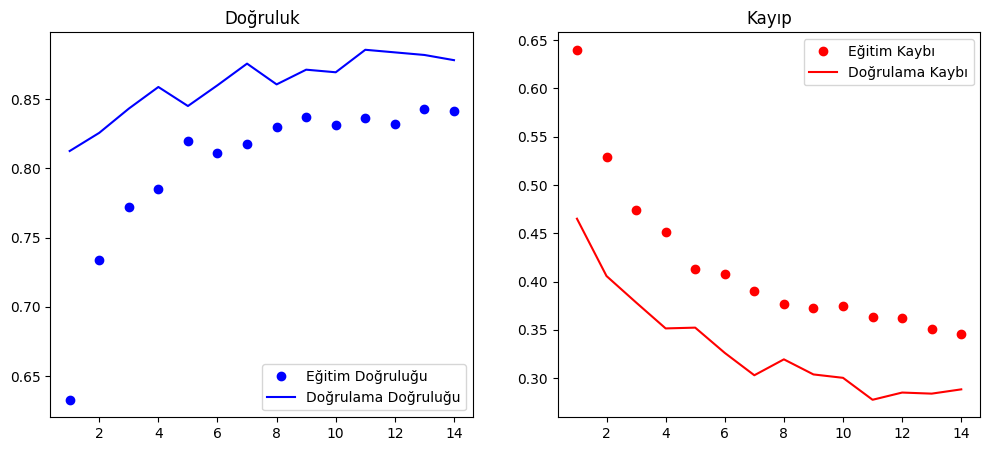

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.8869 - loss: 0.2940

Test Doğruluğu: 88.78%
Test Kaybı: 0.2759


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 1. VERİ YÜKLEME
def get_data_generators():
    """İç içe klasör yapısını otomatik tanıyan veri yükleyici"""
    base_path = '/content/data'

    # Eğitim ve test yollarını bul
    train_path = os.path.join(base_path, 'training_set', 'training_set') if os.path.exists(os.path.join(base_path, 'training_set', 'training_set')) else os.path.join(base_path, 'training_set')
    test_path = os.path.join(base_path, 'test_set', 'test_set') if os.path.exists(os.path.join(base_path, 'test_set', 'test_set')) else os.path.join(base_path, 'test_set')

    # Veri artırma ayarları
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    # Generator'ları oluştur
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

    return train_generator, test_generator

# Veri yükleyicileri al
train_generator, test_generator = get_data_generators()

# 2. VGG-16 MODEL OLUŞTURMA
def build_vgg16_model():
    """VGG16 tabanlı transfer öğrenme modeli"""
    # Önceden eğitilmiş VGG16
    conv_base = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3))

    # Model yapısı
    model = models.Sequential([
        conv_base,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    # Taban katmanları dondur
    conv_base.trainable = False

    # Modeli derle
    model.compile(
        optimizer=optimizers.RMSprop(learning_rate=2e-5),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

vgg_model = build_vgg16_model()
vgg_model.summary()

# 3. MODEL EĞİTİMİ
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1),
    ModelCheckpoint('best_vgg_model.h5', save_best_only=True, verbose=1)
]

history = vgg_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_generator,  # Artık tanımlı
    validation_steps=50,
    callbacks=callbacks)

# 4. PERFORMANS DEĞERLENDİRME
def plot_results(history):
    """Eğitim sonuçlarını görselleştir"""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Eğitim Doğruluğu')
    plt.plot(epochs, val_acc, 'b', label='Doğrulama Doğruluğu')
    plt.title('Doğruluk')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'r', label='Doğrulama Kaybı')
    plt.title('Kayıp')
    plt.legend()

    plt.show()

plot_results(history)

# Test seti değerlendirme
test_loss, test_acc = vgg_model.evaluate(test_generator)
print(f"\nTest Doğruluğu: {test_acc*100:.2f}%")
print(f"Test Kaybı: {test_loss:.4f}")

Test verileri şuradan yüklenecek: /content/data/test_set/test_set


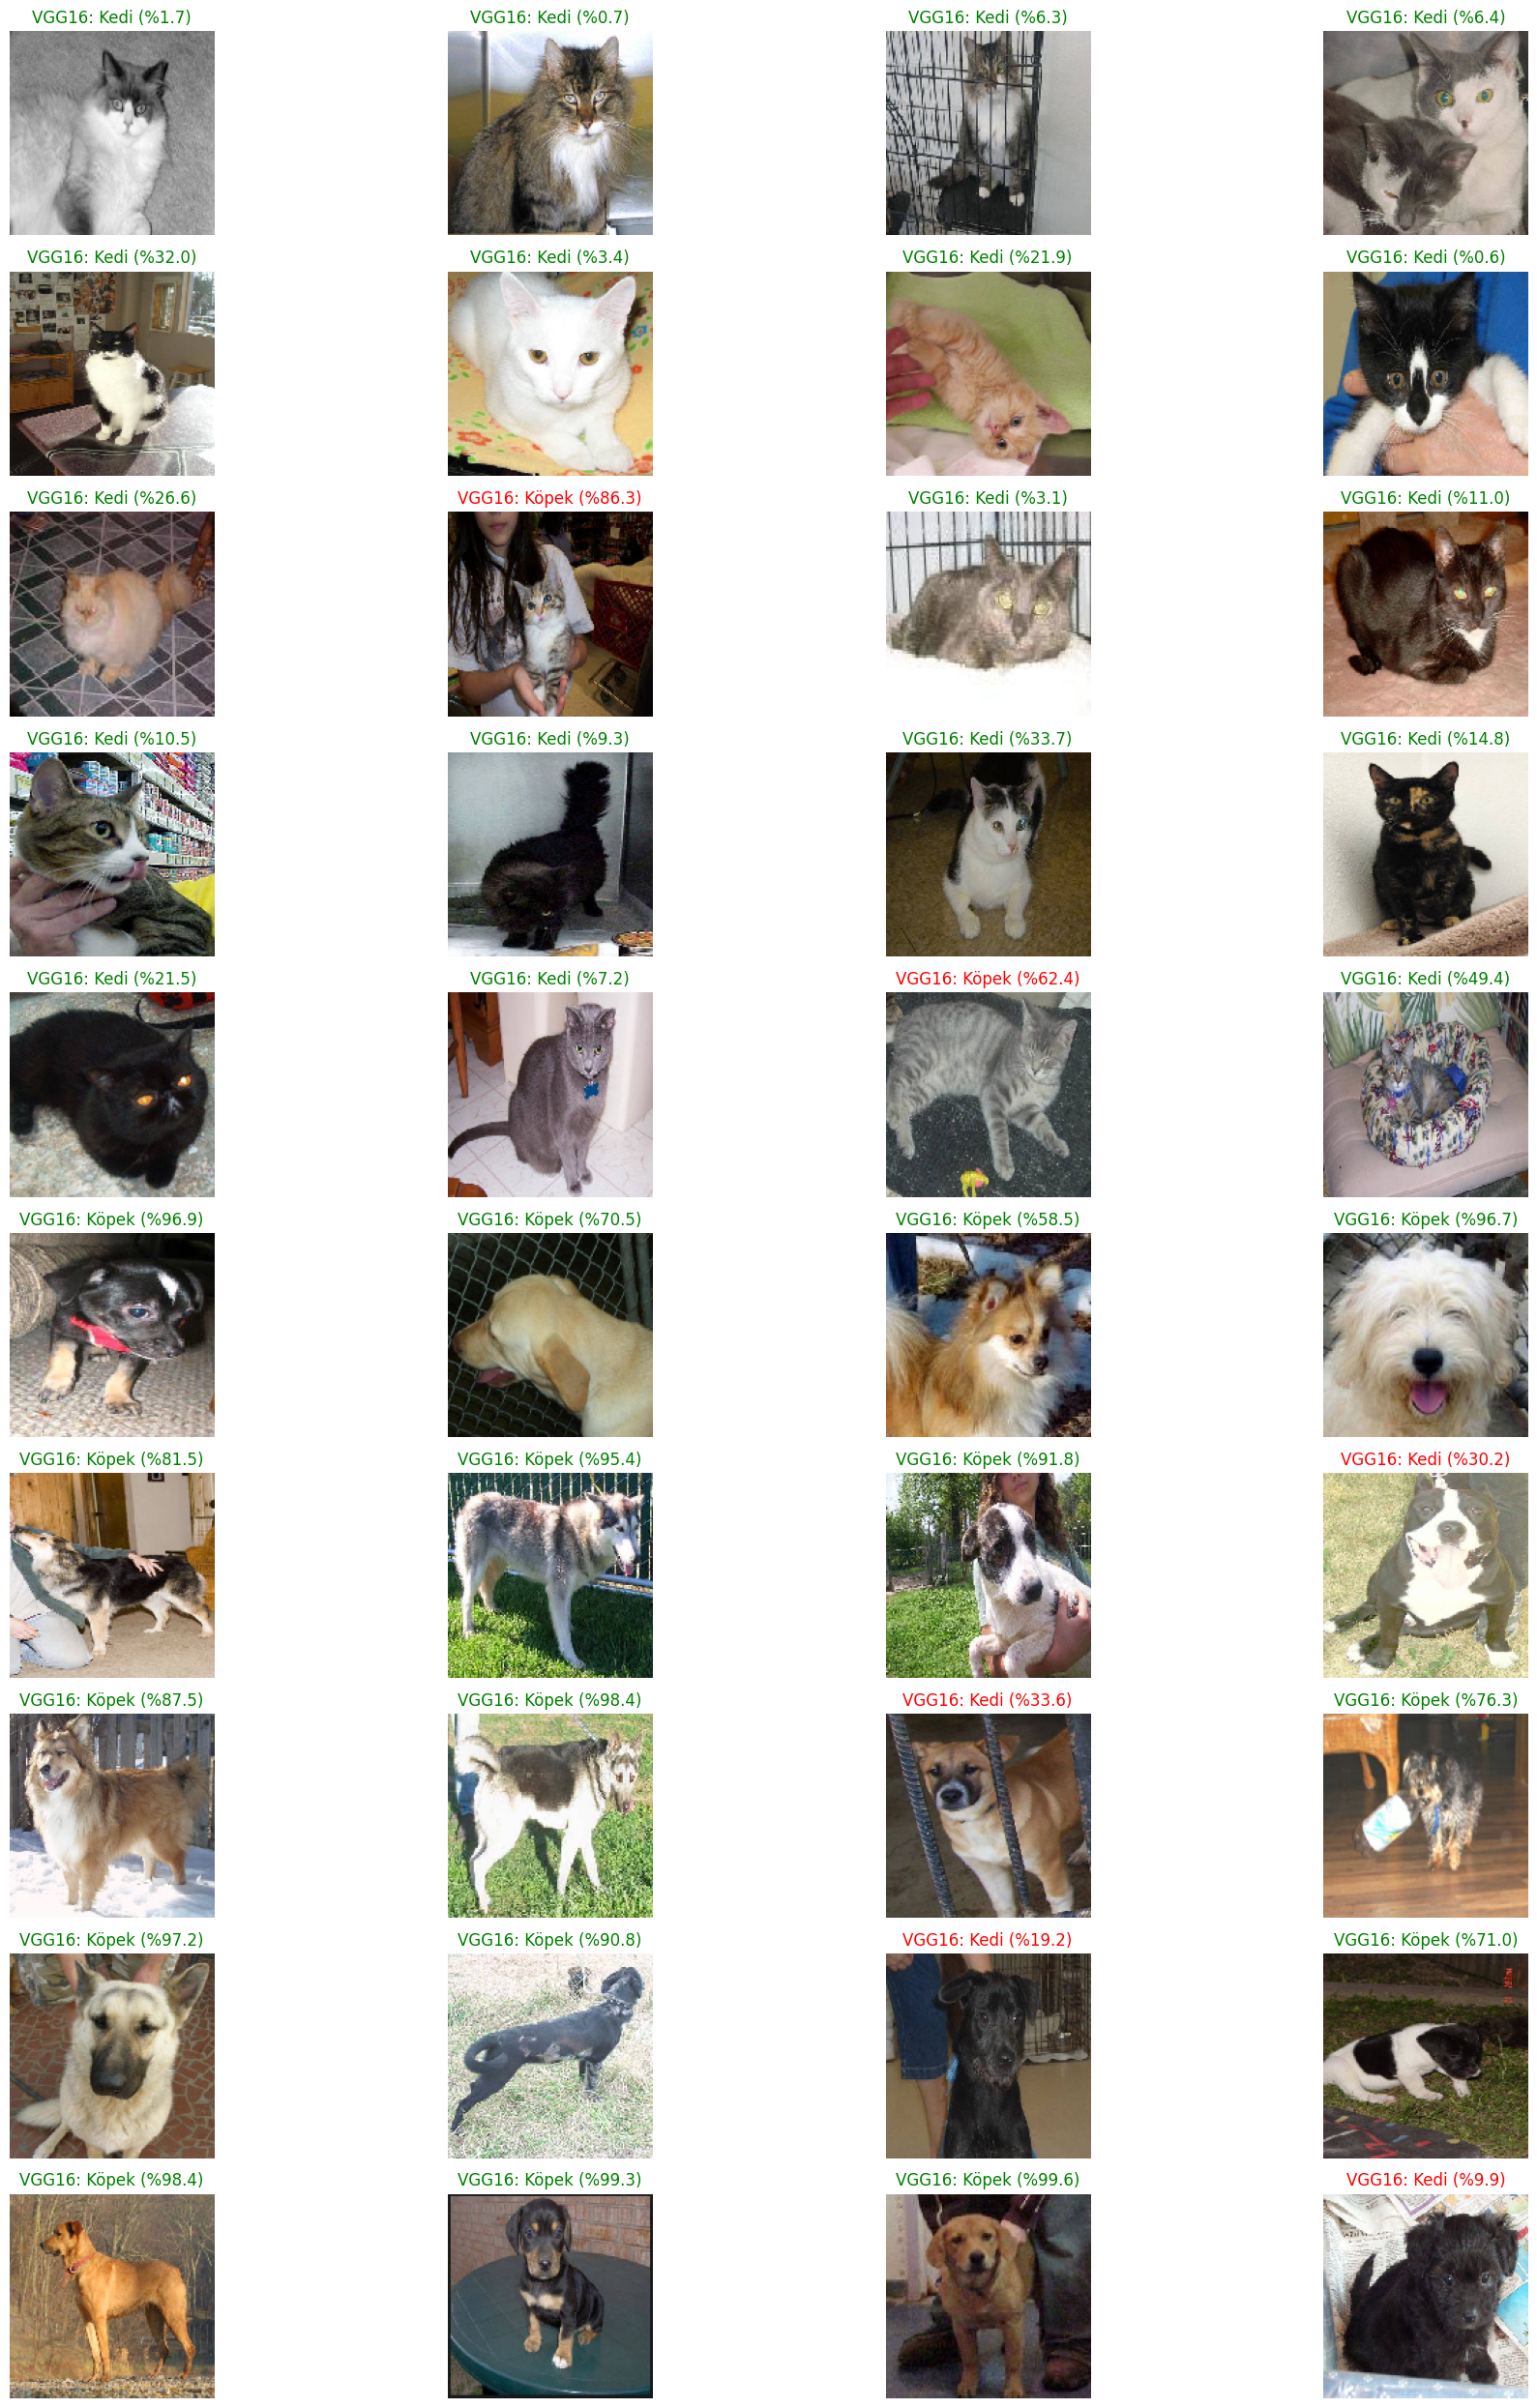


=== VGG-16 PERFORMANS ANALİZİ ===


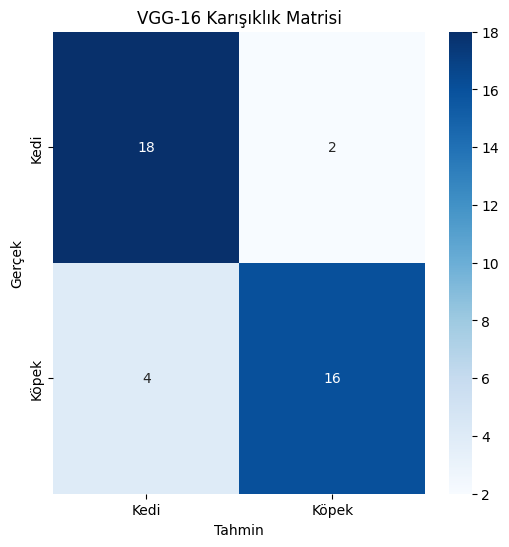


Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Kediler       0.82      0.90      0.86        20
    Köpekler       0.89      0.80      0.84        20

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40


Genel Doğruluk: %85.00
Kedi Başarısı: 18/20 (%90.0)
Köpek Başarısı: 16/20 (%80.0)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def find_test_folder(base_path):
    """İç içe test klasör yapısını otomatik bulur"""
    possible_paths = [
        os.path.join(base_path, 'test_set', 'test_set'),  # /test_set/test_set/
        os.path.join(base_path, 'test_set'),              # /test_set/
        base_path                                         # /
    ]

    for path in possible_paths:
        cat_path = os.path.join(path, 'cats')
        if os.path.exists(cat_path):
            return path
    raise FileNotFoundError(f"Test klasörü bulunamadı: {base_path}")

def test_vgg16_model(model, base_path, num_samples=20):
    """
    VGG-16 modelini iç içe klasör yapısıyla test eder

    Args:
        model: Eğitilmiş VGG-16 modeli
        base_path: Ana veri dizini (içinde test_set olmalı)
        num_samples: Her sınıftan test edilecek örnek sayısı
    """
    # Doğru test klasörünü bul
    test_dir = find_test_folder(base_path)
    print(f"Test verileri şuradan yüklenecek: {test_dir}")

    # Kedi ve köpek klasör yolları
    cat_dir = os.path.join(test_dir, 'cats')
    dog_dir = os.path.join(test_dir, 'dogs')

    # Klasör varlığını kontrol et
    if not os.path.exists(cat_dir):
        raise FileNotFoundError(f"Kedi klasörü bulunamadı: {cat_dir}")
    if not os.path.exists(dog_dir):
        raise FileNotFoundError(f"Köpek klasörü bulunamadı: {dog_dir}")

    # Rastgele örnekleri seç
    cat_images = [os.path.join(cat_dir, f) for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    dog_images = [os.path.join(dog_dir, f) for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    selected_cats = np.random.choice(cat_images, min(num_samples, len(cat_images)), replace=False)
    selected_dogs = np.random.choice(dog_images, min(num_samples, len(dog_images)), replace=False)

    # Tüm test görüntüleri
    test_images = list(selected_cats) + list(selected_dogs)
    true_labels = [0]*len(selected_cats) + [1]*len(selected_dogs)

    # Tahminleri yap
    pred_labels = []
    pred_probs = []

    plt.figure(figsize=(20, 25))

    for i, img_path in enumerate(test_images, 1):
        try:
            # Resmi yükle ve ön işleme
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Tahmin yap
            pred = model.predict(img_array, verbose=0)
            pred_prob = pred[0][0]
            pred_label = 1 if pred_prob > 0.5 else 0

            pred_labels.append(pred_label)
            pred_probs.append(pred_prob)

            # Görselleştirme
            plt.subplot(10, 4, i)
            plt.imshow(img)

            # Renk kodlaması
            true_label = 0 if 'cat' in os.path.basename(img_path).lower() else 1
            color = 'green' if pred_label == true_label else 'red'

            plt.title(f"VGG16: {'Köpek' if pred_label==1 else 'Kedi'} (%{pred_prob*100:.1f})", color=color)
            plt.xlabel(f"Gerçek: {'Köpek' if true_label==1 else 'Kedi'}")
            plt.axis('off')

        except Exception as e:
            print(f"Hata: {img_path} işlenemedi - {str(e)}")
            continue

    plt.tight_layout()
    plt.show()

    # Performans metrikleri
    print("\n=== VGG-16 PERFORMANS ANALİZİ ===")
    print("="*40)

    # Confusion Matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Kedi', 'Köpek'],
                yticklabels=['Kedi', 'Köpek'])
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.title('VGG-16 Karışıklık Matrisi')
    plt.show()

    # Classification Report
    print("\nDetaylı Sınıflandırma Raporu:")
    print(classification_report(true_labels, pred_labels, target_names=['Kediler', 'Köpekler']))

    # Doğruluk istatistikleri
    accuracy = np.mean(np.array(true_labels) == np.array(pred_labels))
    cat_correct = sum(1 for t, p in zip(true_labels[:num_samples], pred_labels[:num_samples]) if t == p)
    dog_correct = sum(1 for t, p in zip(true_labels[num_samples:], pred_labels[num_samples:]) if t == p)

    print(f"\nGenel Doğruluk: %{accuracy*100:.2f}")
    print(f"Kedi Başarısı: {cat_correct}/{num_samples} (%{(cat_correct/num_samples)*100:.1f})")
    print(f"Köpek Başarısı: {dog_correct}/{num_samples} (%{(dog_correct/num_samples)*100:.1f})")

# Testi çalıştır
test_vgg16_model(vgg_model, '/content/data')